# 1、自定义Dataset 的三个重要方法
创建自定义 Dataset 时，必须实现的3个方法 ：__init__()、__len__()、 __getitem__()。

这些方法定义了数据集的基本结构和行为，也是 DataLoader 可以正确的从 Dataset 中读取数据的基础。

## 1）init 方法

In [ ]:
def __init__(self, data_folder, transform=None):
    self.data_path = data_folder
    self.transform = transform
    self.file_list = os.listdir(data_folder)

# 参数： 根据需要传递一些参数，例如文件路径、数据转换等。
# 作用： 可以在这里进行一些初始化工作，例如：设置文件路径、定义数据转换transforms 等。

## 2）len 方法

In [ ]:
def __len__(self):
    return len(self.file_list)

# 返回值： 需返回数据集中的样本的总数。
# 作用：
# 可以通过调用 len(dataset) 来获取数据量
# Dataloader 会用它 和 batch_size 一起来计算一个epoch 要迭代多少个 steps。
# steps = batchsize / len(dataset)，当你对 Dataloader 的对象dataloader 使用 len(dataloader) 的时候，输出即为 steps 的数量

## 3）getitem 方法

In [ ]:
def __getitem__(self, index):
    img_name = os.path.join(self.data_path, self.file_list[index])
    image = Image.open(img_name).convert("RGB")
    label = self.extract_label(img_name)

    if self.transform:
        image = self.transform(image)

    return image, label

# 参数： index 是样本的索引。
# 返回值： 返回数据集中索引指定的样本。通常是一个包含输入数据和对应标签的元组。这里可以根据自己的需求，进行自定义。
# 作用： 根据给定的索引返回数据集中的一个样本。这是用于获取数据集中单个样本的方法。
#      比如，可以通过 dataset[0] 来获取 dataset 中的索引为 0 的样本

以上这三个方法一起定义了 PyTorch 中的 dataset 类，并支持使用 torch.utils.data.DataLoader 来加载数据并进行训练。

# 2、使用举例
用 CIRFAR-100 数据集生成 Dataset

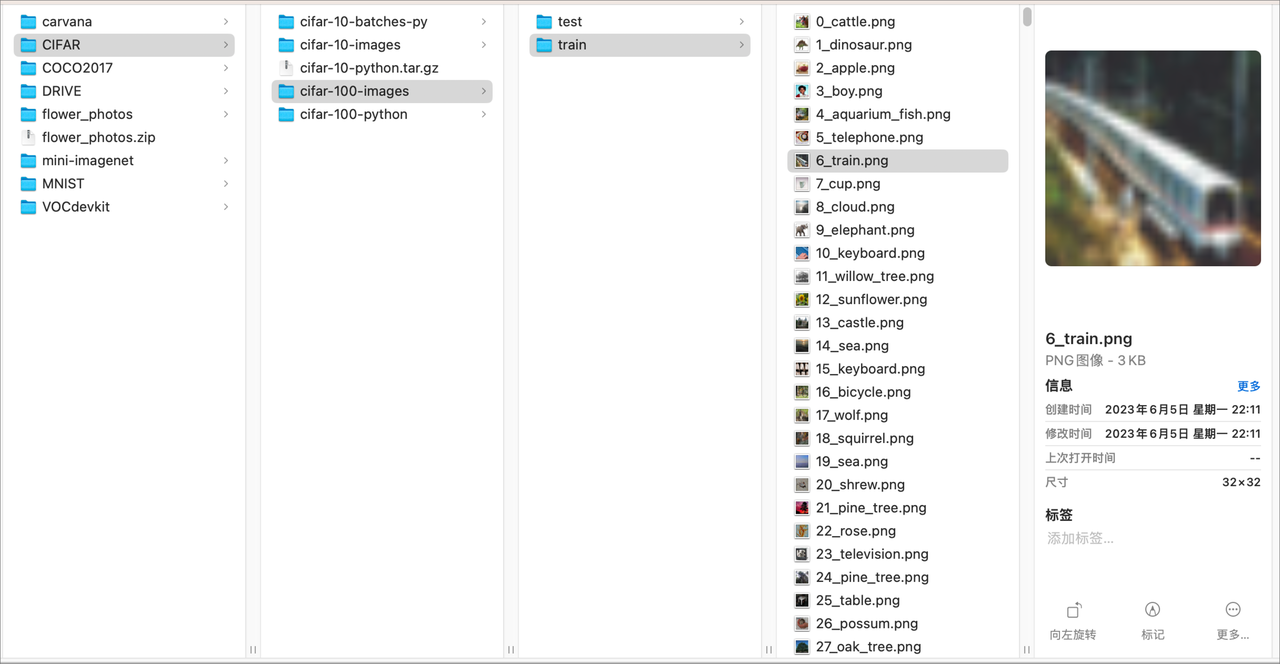

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
import os


class CustomDataset(Dataset):
    def __init__(self, data_folder, transform=None):
        self.data_folder = data_folder
        self.transform = transform
        self.file_list = os.listdir(data_folder)


    def __len__(self):
        return len(self.file_list)


    def __getitem__(self, idx):
        img_name = os.path.join(self.data_folder, self.file_list[idx])
        image = Image.open(img_name)
        label = img_name.split('_')[-1].split('.')[0]

        if self.transform:
            image = self.transform(image)

        return image, label


data_folder = "./dataset/CIFAR/cifar-100-images/train"
dataset = CustomDataset(data_folder, transform=transforms.ToTensor())

print(len(dataset))

# 获取索引为 0 的样本
sample_image, sample_label = dataset[0]
print("Sample Image Shape:", sample_image.shape)
print("Sample Label:", sample_label)